<a href="https://colab.research.google.com/github/Haidar123456/KOMGRAF4709/blob/main/UAS_Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from google.colab import drive

In [29]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/water_potability.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
print(data.head(10))

          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135   

In [31]:
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [32]:
print("Jumlah Nilai Unik pada Setiap Kolom:")
unique_values = data.nunique()
print(unique_values)

Jumlah Nilai Unik pada Setiap Kolom:
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [33]:
print("Jumlah Missing Values Setiap Kolom:")
print(data.isnull().sum())

Jumlah Missing Values Setiap Kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [34]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

def check_outliers(df):
    outlier = {}
    for col in df.select_dtypes(include=['float64']).columns:
        outlier[col] = detect_outliers(df[col])
    return outlier

# Mengecek outlier dalam DataFrame
outliers = check_outliers(data)

# Menampilkan jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
for col, outlier_values in outliers.items():
    print(f"{col}: {len(outlier_values)}")


Jumlah Outlier per Kolom:
ph: 46
Hardness: 83
Solids: 47
Chloramines: 61
Sulfate: 41
Conductivity: 11
Organic_carbon: 25
Trihalomethanes: 33
Turbidity: 19


In [35]:
def replace_outliers_missing(df):
    for col in data.select_dtypes(include=['float64']).columns:
        # Deteksi batas bawah dan atas outlier
        outliers = detect_outliers(df[col])

        # Hitung median kolom
        median = df[col].median()
        df[col] = df[col].fillna(median)

        # Ganti nilai yang di luar batas dengan median
        df[col] = df[col].apply(lambda x: median if x in outliers.values else x)

    return df

In [36]:
data_cleaned = replace_outliers_missing(data)

In [37]:
print("Jumlah Missing Values Setelah Pembersihan:")
print(data_cleaned.isnull().sum())

Jumlah Missing Values Setelah Pembersihan:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [38]:
print("Jumlah Outlier Setelah Pembersihan:")
outliers_after = check_outliers(data_cleaned)
for col, outlier_values in outliers_after.items():
    print(f"{col}: {len(outlier_values)}")

Jumlah Outlier Setelah Pembersihan:
ph: 133
Hardness: 36
Solids: 12
Chloramines: 16
Sulfate: 258
Conductivity: 0
Organic_carbon: 3
Trihalomethanes: 27
Turbidity: 2


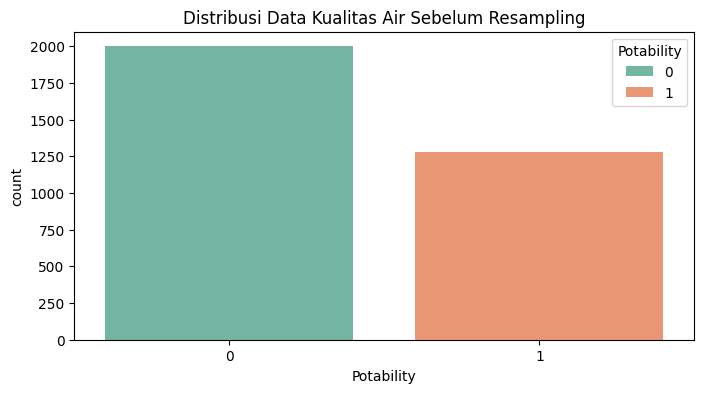

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Potability', data=data_cleaned, palette='Set2', hue='Potability', dodge=False)
plt.title("Distribusi Data Kualitas Air Sebelum Resampling")
plt.show()

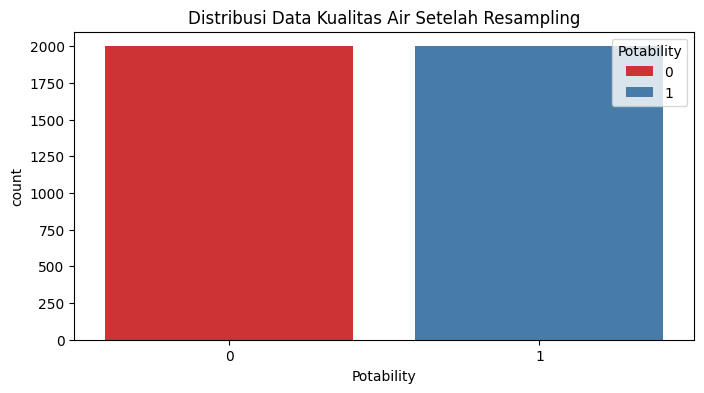

In [40]:
# Resampling untuk mengatasi ketidakseimbangan kelas
majority = data[data_cleaned['Potability'] == 0]
minority = data[data_cleaned['Potability'] == 1]

minority_upsampled = resample(minority,
                              replace=True,     # Sampel dengan penggantian
                              n_samples=len(majority), # Sesuaikan dengan jumlah mayoritas
                              random_state=42)

data_resampled = pd.concat([majority, minority_upsampled])

plt.figure(figsize=(8, 4))
sns.countplot(x='Potability', data=data_resampled, palette='Set1', hue='Potability', dodge=False)
plt.title("Distribusi Data Kualitas Air Setelah Resampling")
plt.show()

In [41]:
# Memisahkan fitur (X) dan target (y)
X = data_cleaned.drop(columns=['Potability'])
y = data_cleaned['Potability']

# Menampilkan bentuk dataset
print("Fitur (X):", X.shape)
print("Target (y):", y.shape)

Fitur (X): (3276, 9)
Target (y): (3276,)


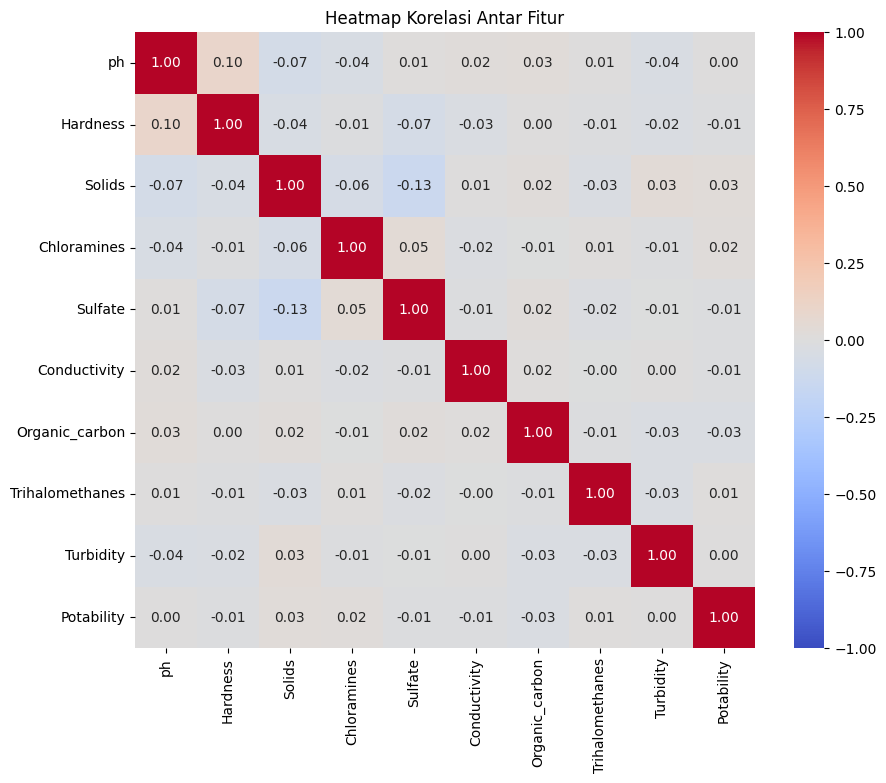

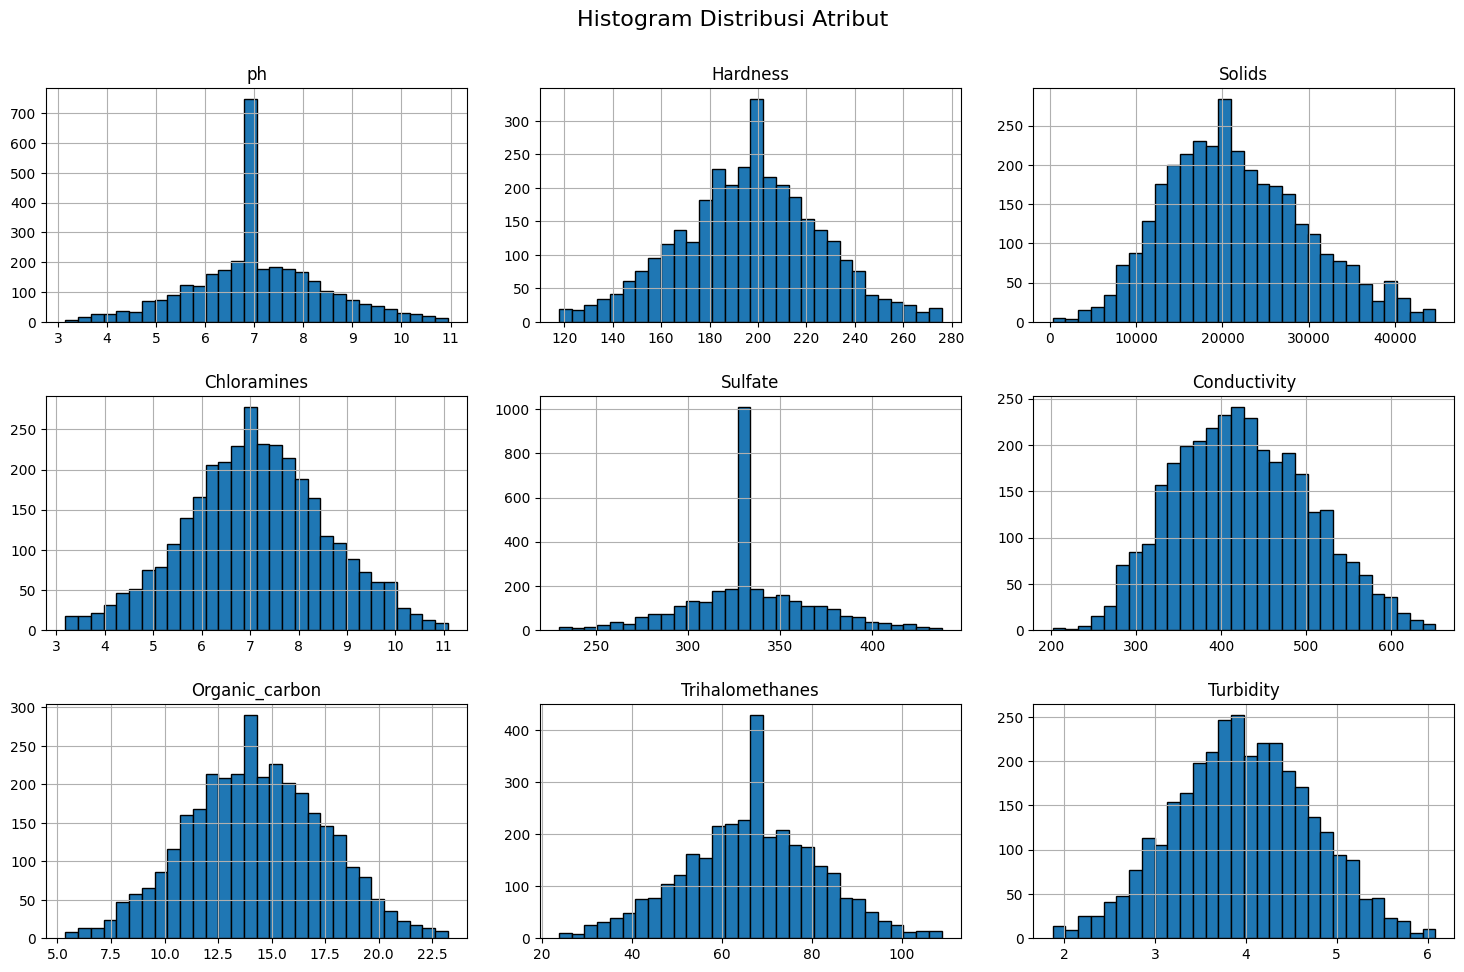

In [42]:
# Menghitung korelasi antar kolom
correlation_matrix = data_cleaned.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Visualisasi distribusi atribut menggunakan histogram
data_features=data_cleaned.drop(columns=['Potability'])
data_features.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram Distribusi Atribut", fontsize=16)
plt.tight_layout(pad=2)
plt.show()

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Membagi dataset menjadi data pelatihan dan pengujian (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Inisialisasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
# Inisialisasi model Logistic Regression
model_lr = LogisticRegression()
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier()
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier()

# Melatih model KNN
model_knn.fit(X_train, y_train)
# Melatih model Logistic Regression
model_lr.fit(X_train, y_train)
# Melatih model Decision Tree
model_dt.fit(X_train, y_train)
# Melatih model Random Forest
model_rf.fit(X_train, y_train)

# Prediksi pada data uji untuk setiap model
y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [46]:
# Confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

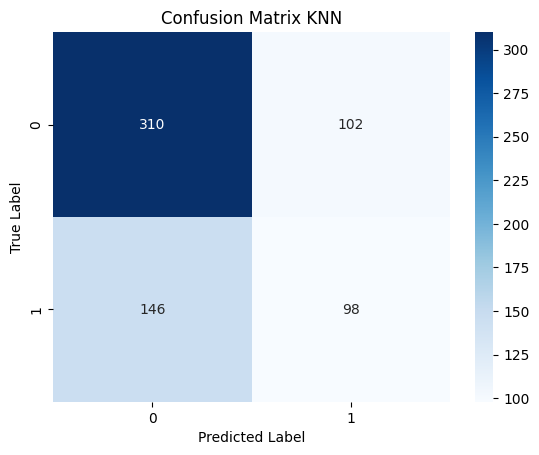

In [47]:
# Visualisasi confusion matrix untuk KNN
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

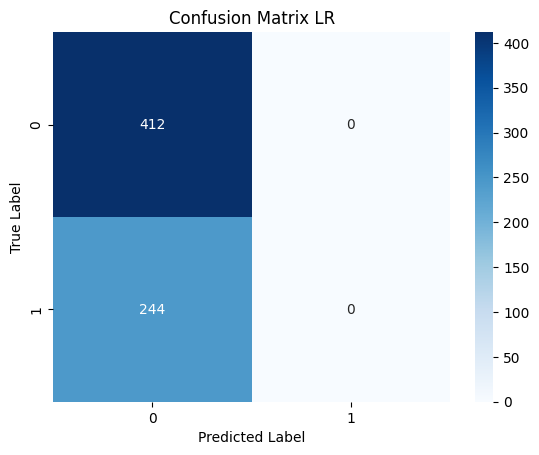

In [51]:
# Visualisasi confusion matrix untuk KNN
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

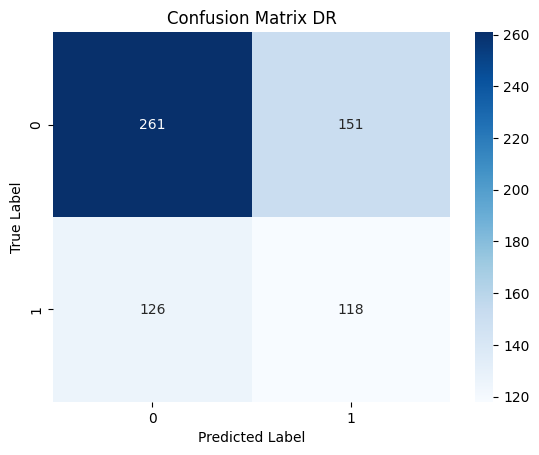

In [52]:
# Visualisasi confusion matrix untuk KNN
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix DR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

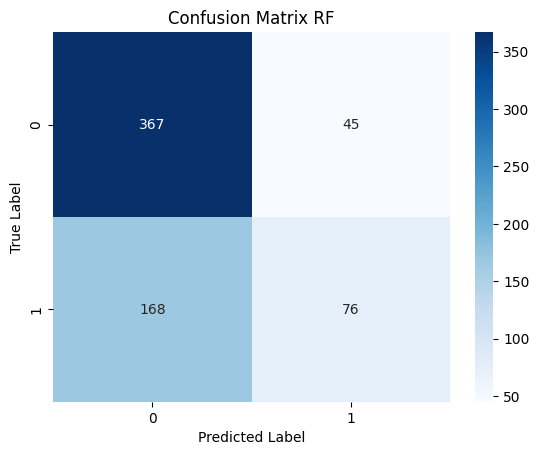

In [53]:
# Visualisasi confusion matrix untuk KNN
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
# Menghitung akurasi untuk setiap model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Menampilkan akurasi
print(f"Akurasi KNN: {accuracy_knn:.4f}")
print(f"Akurasi Logistic Regression: {accuracy_lr:.4f}")
print(f"Akurasi Decision Tree: {accuracy_dt:.4f}")
print(f"Akurasi Random Forest: {accuracy_rf:.4f}")

Akurasi KNN: 0.6220
Akurasi Logistic Regression: 0.6280
Akurasi Decision Tree: 0.5777
Akurasi Random Forest: 0.6753


K-Nearest Neighbors (KNN)

Kelebihan:
- Mudah diimplementasikan dan dipahami.
- Tidak memerlukan asumsi tentang distribusi data.
- Dapat digunakan untuk klasifikasi dan regresi.

Kekurangan:
- Sensitif terhadap data outlier dan noise.
- Membutuhkan banyak memori untuk menyimpan data pelatihan.
- Dapat menjadi lambat untuk dataset yang besar.
- Perlu menentukan nilai k yang optimal.

Logistic Regression

Kelebihan:
- Mudah diinterpretasikan dan dipahami.
- Efisien dalam hal komputasi.
- Dapat menangani data dengan banyak fitur.

Kekurangan:
- Hanya dapat digunakan untuk klasifikasi biner.
- Asumsi linearitas antara fitur dan target.
- Sensitif terhadap data yang tidak seimbang.

Decision Tree

- Kelebihan:
- Mudah diinterpretasikan dan divisualisasikan.
- Dapat menangani data kategorikal dan numerik.
- Tidak memerlukan penskalaan data.

Kekurangan:
- Rentan terhadap overfitting.
- Dapat menghasilkan pohon keputusan yang kompleks.
- Sensitif terhadap perubahan kecil dalam data.

Random Forest

Kelebihan:
- Mengurangi overfitting dibandingkan dengan Decision Tree.
- Lebih robust terhadap noise dan outlier.
- Dapat menangani data dengan banyak fitur.

Kekurangan:
- Lebih kompleks dan sulit diinterpretasikan dibandingkan dengan Decision Tree.
- Membutuhkan lebih banyak waktu untuk pelatihan.